## Initialize

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cPickle as pickle
import os
h11 = 20
var = 1.0/np.sqrt(h11)
ndraws = 100

## Totally random analysis (F,W,Z,U drawn randomly, in can norm basis), a la Liam

In [3]:
def all_pos(dat):
    return min(dat) > 0

all_hess = []
spec  = []
for ii in range(ndraws):
    r1 = np.random.normal(loc = 0, scale = var,size = [2*h11,2*h11])
    r2 = np.random.normal(loc = 0, scale = var,size = [2*h11,2*h11])
    r3 = np.random.normal(loc = 0, scale = var,size = [2*h11,2*h11])
    H = np.einsum('ij',r1) + np.einsum('ji',np.conj(r1)) + np.einsum('ik,kj',r2,np.transpose(np.conj(r2))) 
    + np.einsum('ik,kj',r3,np.transpose(np.conj(r3))) + np.identity(2*h11)*(1-.01)
    evs = np.linalg.eig(H)[0]
    all_hess.append(H)
    if all_pos(evs): print 'whoaskies'
    spec = spec + list(evs)


In [168]:
with open('hess/h11_'+str(h11)+"_WWW.pickle", 'w') as pickle_file:
            pickle.dump(np.array(all_hess),pickle_file)

In [171]:
len(all_hess)

3000

/Users/cody/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


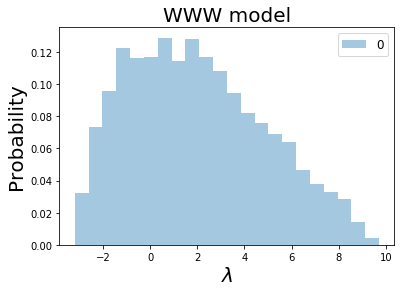

frac pos =  0.708
frac neg =  0.292


In [4]:
sns.distplot(spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("WWW model",fontsize = 20)
plt.xlabel("$\lambda$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()
numpos = len([ii for ii in spec if ii > 0])
numneg = len([ii for ii in spec if ii < 0])
tt = (numpos + numneg)*1.0
print "frac pos = ", numpos*1.0/tt
print "frac neg = ", numneg*1.0/tt

Seems to reproduce Liam's results rather well (note the shift matrix is not included here)

## Now with Kahler data (entries of K, W, and their derivatives drawn randomly), feeds into Z, U, etc.

In [5]:
spec  = []
number_neg = []
all_hess = []
for ii in range(ndraws):
    #all Kahler derivatives
    k1 = np.random.normal(loc = 0, scale = var,size = h11)
    k2p = np.random.normal(loc = 0, scale = var,size = [h11,h11])
    k2 = k2p + np.transpose(k2p)
    k3p = np.random.normal(loc = 0, scale = var,size = [h11,h11,h11])
    k3 = 1/6.0*(k3p + np.einsum('ikj',k3p) + np.einsum('jik',k3p) + np.einsum('jki',k3p) 
                + np.einsum('kij',k3p) + np.einsum('kji',k3p))

    k4p = np.random.normal(loc = 0, scale = var,size = [h11,h11,h11,h11])
    k4 =  1/24.0*( np.einsum('ijkl',k4p) + np.einsum('ikjl',k4p) + np.einsum('jikl',k4p) + np.einsum('jkil',k4p)
                  + np.einsum('kijl',k4p) + np.einsum('kjil',k4p))
    + 1/24.0*(np.einsum('ijlk',k4p) + np.einsum('iklj',k4p) + np.einsum('jilk',k4p) + np.einsum('jkli',k4p) 
              + np.einsum('kilj',k4p) + np.einsum('kjli',k4p))
    + 1/24.0*(np.einsum('iljk',k4p) + np.einsum('ilkj',k4p) + np.einsum('jlik',k4p) + np.einsum('jlki',k4p)
              + np.einsum('klij',k4p) + np.einsum('klji',k4p))
    + 1/24.0*(np.einsum('lijk',k4p) + np.einsum('likj',k4p) + np.einsum('ljik',k4p) + np.einsum('ljki',k4p) 
              + np.einsum('lkij',k4p) + np.einsum('lkji',k4p))

    R4p = np.random.normal(loc = 0, scale = var,size = [h11,h11,h11,h11])
    R4 =  1/24.0*(np.einsum('ijkl',R4p) + np.einsum('ikjl',R4p) + np.einsum('jikl',R4p) + np.einsum('jkil',R4p) 
                  + np.einsum('kijl',R4p) + np.einsum('kjil',R4p))
    + 1/24.0*(np.einsum('ijlk',R4p) + np.einsum('iklj',R4p) + np.einsum('jilk',R4p) + np.einsum('jkli',R4p) 
              + np.einsum('kilj',R4p) + np.einsum('kjli',R4p))
    + 1/24.0*(np.einsum('iljk',R4p) + np.einsum('ilkj',R4p) + np.einsum('jlik',R4p) + np.einsum('jlki',R4p)
              + np.einsum('klij',R4p) + np.einsum('klji',R4p))
    + 1/24.0*(np.einsum('lijk',R4p) + np.einsum('likj',R4p) + np.einsum('ljik',R4p) + np.einsum('ljki',R4p) 
              + np.einsum('lkij',R4p) + np.einsum('lkji',R4p))

    #superpotential and its derivatives, drawn randomly
    W = np.random.normal(loc = 0, scale = var)
    W1 = np.random.normal(loc = 0, scale = var,size = h11)
    pW2 = np.random.normal(loc = 0, scale = var,size = [h11,h11])
    pW3 = np.random.normal(loc = 0, scale = var,size = [h11,h11,h11])
    W2 = 0.5*(pW2 + np.transpose(pW2))
    W3 = 1/6.0*np.array([[[pW3[a][b][c] + pW3[a][c][b] + pW3[b][a][c]+ pW3[b][c][a] + pW3[c][a][b]
                           + pW3[c][b][a] for a in range(h11)]
        for b in range(h11)] for c in range(h11)])

    #metric inverse:
    k2inv = np.linalg.inv(k2)

    #christoffels, last index is up:
    Gamma = np.einsum('ijk,kl',k3,k2inv)

    #F-terms:
    F1 = W1 + W*k1

    # #F-term derivative
    # dF1 = W2 + W*k2 + np.einsum('i,j',W1,k1)

    #Z-matrix:
    Z2 = W2 + W*k2 + np.einsum('i,j',k1,W1) + np.einsum('i,j',W1,k1) + W*np.einsum('i,j',k1,k1) 
    - np.einsum('ijk,k',Gamma,F1)

    #U-tensor
    #fully symmetrized version:

    U1 = W3 + k3*W + W*np.einsum('i,j,k',k1,k1,k1) - np.einsum('lm,mijk,l',k2inv,k4,F1)
    U2 = np.einsum('ij,k',k2,W1) + np.einsum('ik,j',k2,W1) + np.einsum('jk,i',k2,W1)
    U3 = np.einsum('ij,k',W2,k1) + np.einsum('ik,j',W2,k1) + np.einsum('jk,i',W2,k1)
    U4 = np.einsum('ij,k',k2,k1*W) + np.einsum('ik,j',k2,k1*W) + np.einsum('jk,i',k2,k1*W)
    U5 = np.einsum('i,j,k',k1,k1,W1) + np.einsum('k,j,i',k1,k1,W1) + np.einsum('i,k,j',k1,k1,W1)
    U6 = -np.einsum('jil,kl',Gamma,W2) -np.einsum('jkl,il',Gamma,W2) -np.einsum('ikl,jl',Gamma,W2)
    U7 = -np.einsum('jil,kl',Gamma,k2*W) -np.einsum('jkl,il',Gamma,k2*W) -np.einsum('ikl,jl',Gamma,k2*W)
    U8 = -np.einsum('jil,k,l',Gamma,k1,k1*W) -np.einsum('jkl,i,l',Gamma,k1,k1*W) 
    -np.einsum('kil,j,l',Gamma,k1,k1*W)
    U9 = -np.einsum('jil,k,l',Gamma,W1,k1) -np.einsum('jkl,i,l',Gamma,W1,k1) -np.einsum('kil,j,l',Gamma,W1,k1)
    U10 = -np.einsum('jil,k,l',Gamma,k1,W1) -np.einsum('jkl,i,l',Gamma,k1,W1) -np.einsum('kil,j,l',Gamma,k1,W1)
    U11 = np.einsum('klm,ijl,m',Gamma,Gamma,W1) + np.einsum('jlm,ikl,m',Gamma,Gamma,W1) 
    + np.einsum('ilm,kjl,m',Gamma,Gamma,W1)
    U12 = np.einsum('klm,ijl,m',Gamma,Gamma,k1*W) + np.einsum('jlm,ikl,m',Gamma,Gamma,k1*W) 
    + np.einsum('ilm,kjl,m',Gamma,Gamma,k1*W)

    U = U1 + U2 + U3 + U4 + U5 + U6 + U7 + U8 + U9 + U10 + U11 + U12

    #make the Hessian pieces
    Habarb = np.einsum('il,lk,jk',Z2,k2inv,np.conj(Z2)) - np.einsum('i,j',F1,np.conj(F1)) 
    - np.einsum('ijkl,km,ln,m,n',R4,k2inv,k2inv,np.conj(F1),F1)
    Hbarab = np.conj(Habarb)
    Hab = np.einsum('ijk,kl,l',U,k2inv,np.conj(F1)) - Z2*np.conj(W)
    Hbarabarb = np.transpose(np.conj(Hab))
    #assemble the Hessian
    H = np.block([[Habarb, Hab],[Hbarabarb, Hbarab]]) 
    + np.block([[k2, np.full((h11,h11),0)],[np.full((h11,h11),0), k2]])*(np.einsum('i,ik,k',F1,k2inv,F1)
                                                                         - 2*W*np.conj(W))
    all_hess.append(H)
    eigs = np.linalg.eig(H)[0]
    spec = spec + list([ee for ee in eigs])
    number_neg.append(sum([ee < 0 for ee in eigs]))

The eigenvalues in this case vary over order of magnitude, so it's better to plot things on a log scale. let's plot the negative and positive eigenvalues on a log-scale in seperate plots:

In [174]:
with open('hess/h11_'+str(h11)+"_RandomKahler.pickle", 'w') as pickle_file:
            pickle.dump(np.array(all_hess),pickle_file)

In [7]:
np.linalg.eig(all_hess[1])[0]

array([ 213.42369627, -208.09096593,   52.63375876,  -41.36279363,
         44.11250466,  -32.49036258,   32.61250747,  -27.8689958 ,
        -23.21607278,  -21.1379226 ,  -19.37481644,   24.23701065,
        -15.2891948 ,   22.16409196,   19.76884025,   18.50630733,
        -10.76120877,   -9.48459176,   12.24240482,   10.3165228 ,
          9.17894766,    7.89726024,    4.46514428,    1.68757092,
          1.47631603,   -0.44839307,   -4.91876308,   -2.33818523,
         -2.77495072,   -3.24227303])

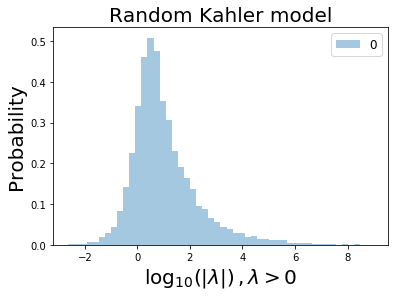

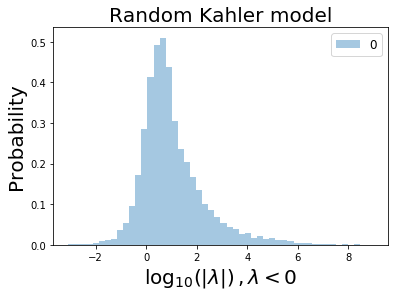

frac pos =  0.4978
frav neg =  0.5022


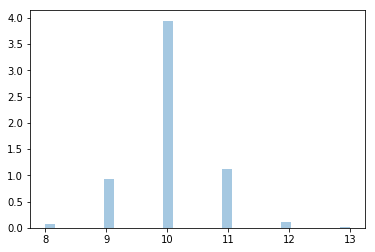

In [36]:
#postive eigenvalues
pos_spec = [np.log10(ev) for ev in spec if ev > 0]
sns.distplot(pos_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("Random Kahler model",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda > 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()

#negative eigenvalues
neg_spec = [np.log10(-ev) for ev in spec if ev < 0]
sns.distplot(neg_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("Random Kahler model",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda < 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()
num_pos = len(pos_spec)*1.0
num_neg = len(neg_spec)*1.0
tt = (num_pos + num_neg)
print "frac pos = ", num_pos/tt
print "frav neg = ", num_neg/tt

sns.distplot(number_neg,kde=False,norm_hist = True)
plt.show()

## Include actual CY Kahler data, but draw superpotential and derivatives randomly

In [12]:
numtoload = 200
K2files = [d for d in os.listdir('hess_data_sample') if d[0] == 'h' and '_'+str(h11)+'_' in d and '_K.pickle' in d]
print len(K2files)
polynums = [int(K2file.split('poly')[1].split('_')[0]) for K2file in K2files]
kdata = []
for ii in range(numtoload):
    try:
        with open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_ka.pickle', 'r') as pickle_file:
            k1 = np.array(pickle.load(pickle_file))
        #k1 = pickle.load(open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_ka.pickle','r'))
        with open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_K.pickle', 'r') as pickle_file:
            k2inv = np.array(pickle.load(pickle_file))
        k2 = np.linalg.inv(k2inv)
        with open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_kabc.pickle', 'r') as pickle_file:
            k3 = pickle.load(pickle_file)
        with open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_kabcd.pickle', 'r') as pickle_file:
            k4 = pickle.load(pickle_file)
        Aab = -4.0*np.array(k2) + 1/2.0*np.einsum('i,j',2*k1,2*k1)
        corrtok3 = -1/16.0*(np.einsum('ij,k',Aab,-2*k1) + np.einsum('ik,j',Aab,-2*k1) + np.einsum('kj,i',Aab,-2*k1))
        k3 = k3 + corrtok3
        R4 = k4 - np.einsum('ikp,pm,mjl',k3,k2,k3)
        kdata.append([k1,k2inv,k2,k3,k4,R4])
        
    except:
        print "inscure pickle string"
        print ii
        
        
    #k2inv = np.linalg.inv(pickle.load(open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])
    #                                       +'_K.pickle','r')))
    #k2 = np.linalg.inv(k2inv)
    #k3 = pickle.load(open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_kabc.pickle','r'))
    #k4 = pickle.load(open('hess_data_sample/h11_'+str(h11)+'_poly' + str(polynums[ii])+'_kabcd.pickle','r'))
    #R4 = k4 - np.einsum('ikp,pm,mjl',k3,k2,k3)
    #kdata.append([k1,k2inv,k2,k3,k4,R4])

211


In [180]:
spec  = []
all_hess = []
number_neg = []
numdrawspergeom = 25
for ii in range(len(kdata)):
    for jj in range(numdrawspergeom):
        #all Kahler derivatives
        k1 = np.array(kdata[ii][0])
        k2 = np.array(kdata[ii][2])
        k2inv = np.array(kdata[ii][1])
        k3 =np.array(kdata[ii][3])
        k4 =  np.array(kdata[ii][4])
        R4 =  np.array(kdata[ii][5])

        #superpotential and its derivatives, drawn randomly
        W = np.random.normal(loc = 0, scale = var) + 1j*np.random.normal(loc = 0, scale = var)
        W1 = np.random.normal(loc = 0, scale = var,size = h11) + 1j*np.random.normal(
            loc = 0, scale = var,size = h11)
        pW2 = np.random.normal(loc = 0, scale = var,size = [h11,h11])+1j*np.random.normal(
            loc = 0,scale = var,size = [h11,h11])
        pW3 = np.random.normal(loc = 0, scale = var,size = [h11,h11,h11])+1j*np.random.normal(
            loc = 0, scale = var,size = [h11,h11,h11])
        W2 = 0.5*(pW2 + np.transpose(pW2))
        W3 = 1/6.0*np.array([[[pW3[a][b][c] + pW3[a][c][b] + pW3[b][a][c]+ pW3[b][c][a] + pW3[c][a][b]
                               + pW3[c][b][a] for a in range(h11)]
            for b in range(h11)] for c in range(h11)])

        #metric inverse:
        #k2inv = np.linalg.inv(k2)

        #christoffels, last index is up:
        Gamma = np.einsum('ijk,kl',k3,k2inv)

        #F-terms:
        F1 = W1 + W*k1

        # #F-term derivative
        # dF1 = W2 + W*k2 + np.einsum('i,j',W1,k1)

        #Z-matrix:
        Z2 = W2 + W*k2 + np.einsum('i,j',k1,W1) + np.einsum('i,j',W1,k1) + W*np.einsum('i,j',k1,k1) 
        - np.einsum('ijk,k',Gamma,F1)

        #U-tensor
        #fully symmetrized version:

        U1 = W3 + k3*W + W*np.einsum('i,j,k',k1,k1,k1) - np.einsum('lm,mijk,l',k2inv,k4,F1)
        U2 = np.einsum('ij,k',k2,W1) + np.einsum('ik,j',k2,W1) + np.einsum('jk,i',k2,W1)
        U3 = np.einsum('ij,k',W2,k1) + np.einsum('ik,j',W2,k1) + np.einsum('jk,i',W2,k1)
        U4 = np.einsum('ij,k',k2,k1*W) + np.einsum('ik,j',k2,k1*W) + np.einsum('jk,i',k2,k1*W)
        U5 = np.einsum('i,j,k',k1,k1,W1) + np.einsum('k,j,i',k1,k1,W1) + np.einsum('i,k,j',k1,k1,W1)
        U6 = -np.einsum('jil,kl',Gamma,W2) -np.einsum('jkl,il',Gamma,W2) -np.einsum('ikl,jl',Gamma,W2)
        U7 = -np.einsum('jil,kl',Gamma,k2*W) -np.einsum('jkl,il',Gamma,k2*W) -np.einsum('ikl,jl',Gamma,k2*W)
        U8 = -np.einsum('jil,k,l',Gamma,k1,k1*W) -np.einsum('jkl,i,l',Gamma,k1,k1*W) 
        -np.einsum('kil,j,l',Gamma,k1,k1*W)
        U9 = -np.einsum('jil,k,l',Gamma,W1,k1) -np.einsum('jkl,i,l',Gamma,W1,k1) -np.einsum('kil,j,l',Gamma,W1,k1)
        U10 = -np.einsum('jil,k,l',Gamma,k1,W1) -np.einsum('jkl,i,l',Gamma,k1,W1) -np.einsum('kil,j,l',Gamma,k1,W1)
        U11 = np.einsum('klm,ijl,m',Gamma,Gamma,W1) + np.einsum('jlm,ikl,m',Gamma,Gamma,W1) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,W1)
        U12 = np.einsum('klm,ijl,m',Gamma,Gamma,k1*W) + np.einsum('jlm,ikl,m',Gamma,Gamma,k1*W) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,k1*W)

        U = U1 + U2 + U3 + U4 + U5 + U6 + U7 + U8 + U9 + U10 + U11 + U12

        #make the Hessian pieces
        Habarb = np.einsum('il,lk,jk',Z2,k2inv,np.conj(Z2)) - np.einsum('i,j',F1,np.conj(F1)) 
        - np.einsum('ijkl,km,ln,m,n',R4,k2inv,k2inv,np.conj(F1),F1)
        Hbarab = np.conj(Habarb)
        Hab = np.einsum('ijk,kl,l',U,k2inv,np.conj(F1)) - Z2*np.conj(W)
        Hbarabarb = np.transpose(np.conj(Hab))
        #assemble the Hessian
        H = np.block([[Habarb, Hab],[Hbarabarb, Hbarab]]) 
        + np.block([[k2, np.full((h11,h11),0)],[np.full((h11,h11),0), k2]])*(np.einsum('i,ik,k',F1,k2inv,F1)
                                                                             - 2*W*np.conj(W))
        all_hess.append(H)
        eigs = np.real(np.linalg.eig(H)[0])
        spec = spec + list([ee for ee in eigs])
        number_neg.append(sum([ee < 0 for ee in eigs]))

In [181]:
with open('hess/h11_'+str(h11)+"_CYRandomW.pickle", 'w') as pickle_file:
            pickle.dump(np.array(all_hess),pickle_file)

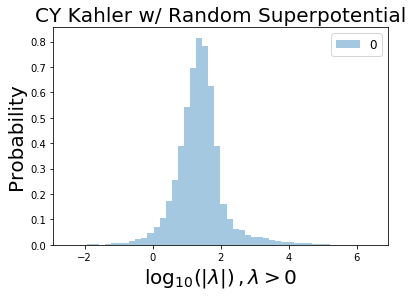

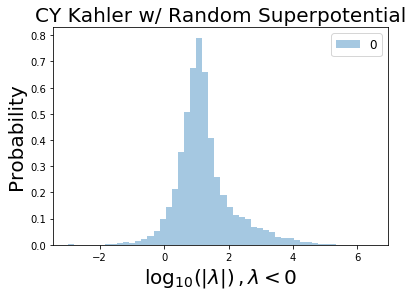

frac pos =  0.659
frav neg =  0.341


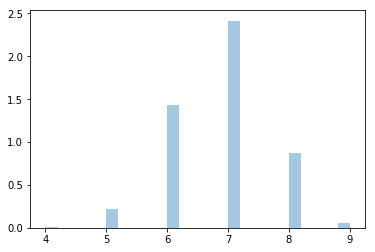

In [8]:
#postive eigenvalues
pos_spec = [np.log10(ev) for ev in spec if ev > 0]
sns.distplot(pos_spec,kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Superpotential",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda > 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()

#negative eigenvalues
neg_spec = [np.log10(-ev) for ev in spec if ev < 0]
sns.distplot(neg_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Superpotential",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda < 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()
num_pos = len(pos_spec)*1.0
num_neg = len(neg_spec)*1.0
tt = (num_pos + num_neg)
print "frac pos = ", num_pos/tt
print "frav neg = ", num_neg/tt

sns.distplot(number_neg,kde=False,norm_hist = True)
plt.show()

## Finally, include actual CY Kahler data, with exponential superpotentials, and Pfaffians drawn randomly

In [13]:
spec  = []
number_neg = []
numdrawspergeom = 25
all_hess = []
for ii in range(len(kdata)):
#for ii in range(1):
    for jj in range(numdrawspergeom):
        #all Kahler derivatives
        k1 = np.array(kdata[ii][0])
        k2 = np.array(kdata[ii][2])
        k2inv = np.array(kdata[ii][1])
        k3 =np.array(kdata[ii][3])
        k4 =  np.array(kdata[ii][4])
        R4 =  np.array(kdata[ii][5])
        
        As = np.random.normal(loc = 0, scale = var,size = h11) + 1j*np.random.normal(
            loc = 0, scale = var,size = h11)
        Wnpterms = np.array([As[nn]*np.exp(-2*np.pi*np.abs(2*k1[nn])) for nn in range(h11)])
        #superpotential and its derivatives, drawn randomly
        W0 = np.random.normal(loc = 0, scale = var) + 1j*np.random.normal(loc = 0, scale = var)
        W = W0 + np.sum(Wnpterms)
        W1 = -2*np.pi*Wnpterms
        W2 = np.full([h11,h11],0)
        W3 = np.full([h11,h11,h11],0)
        for zz in range(h11):
            W2[zz,zz] = -2*np.pi*W1[zz]
            W3[zz,zz,zz] = -2*np.pi*(-2*np.pi*W1[zz])

        #metric inverse:
        #k2inv = np.linalg.inv(k2)

        #christoffels, last index is up:
        Gamma = np.einsum('ijk,kl',k3,k2inv)

        #F-terms:
        F1 = W1 + W*k1

        # #F-term derivative
        # dF1 = W2 + W*k2 + np.einsum('i,j',W1,k1)

        #Z-matrix:
        Z2 = W2 + W*k2 + np.einsum('i,j',k1,W1) + np.einsum('i,j',W1,k1) + W*np.einsum('i,j',k1,k1) 
        - np.einsum('ijk,k',Gamma,F1)

        #U-tensor
        #fully symmetrized version:

        U1 = W3 + k3*W + W*np.einsum('i,j,k',k1,k1,k1) - np.einsum('lm,mijk,l',k2inv,k4,F1)
        U2 = np.einsum('ij,k',k2,W1) + np.einsum('ik,j',k2,W1) + np.einsum('jk,i',k2,W1)
        U3 = np.einsum('ij,k',W2,k1) + np.einsum('ik,j',W2,k1) + np.einsum('jk,i',W2,k1)
        U4 = np.einsum('ij,k',k2,k1*W) + np.einsum('ik,j',k2,k1*W) + np.einsum('jk,i',k2,k1*W)
        U5 = np.einsum('i,j,k',k1,k1,W1) + np.einsum('k,j,i',k1,k1,W1) + np.einsum('i,k,j',k1,k1,W1)
        U6 = -np.einsum('jil,kl',Gamma,W2) -np.einsum('jkl,il',Gamma,W2) -np.einsum('ikl,jl',Gamma,W2)
        U7 = -np.einsum('jil,kl',Gamma,k2*W) -np.einsum('jkl,il',Gamma,k2*W) -np.einsum('ikl,jl',Gamma,k2*W)
        U8 = -np.einsum('jil,k,l',Gamma,k1,k1*W) -np.einsum('jkl,i,l',Gamma,k1,k1*W) 
        -np.einsum('kil,j,l',Gamma,k1,k1*W)
        U9 = -np.einsum('jil,k,l',Gamma,W1,k1) -np.einsum('jkl,i,l',Gamma,W1,k1) -np.einsum('kil,j,l',Gamma,W1,k1)
        U10 = -np.einsum('jil,k,l',Gamma,k1,W1) -np.einsum('jkl,i,l',Gamma,k1,W1) -np.einsum('kil,j,l',Gamma,k1,W1)
        U11 = np.einsum('klm,ijl,m',Gamma,Gamma,W1) + np.einsum('jlm,ikl,m',Gamma,Gamma,W1) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,W1)
        U12 = np.einsum('klm,ijl,m',Gamma,Gamma,k1*W) + np.einsum('jlm,ikl,m',Gamma,Gamma,k1*W) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,k1*W)

        U = U1 + U2 + U3 + U4 + U5 + U6 + U7 + U8 + U9 + U10 + U11 + U12

        #make the Hessian pieces
        Habarb = np.einsum('il,lk,jk',Z2,k2inv,np.conj(Z2)) - np.einsum('i,j',F1,np.conj(F1)) 
        - np.einsum('ijkl,km,ln,m,n',R4,k2inv,k2inv,np.conj(F1),F1)
        Hbarab = np.conj(Habarb)
        Hab = np.einsum('ijk,kl,l',U,k2inv,np.conj(F1)) - Z2*np.conj(W)
        Hbarabarb = np.transpose(np.conj(Hab))
        #assemble the Hessian
        H = np.block([[Habarb, Hab],[Hbarabarb, Hbarab]]) 
        + np.block([[k2, np.full((h11,h11),0)],[np.full((h11,h11),0), k2]])*(np.einsum('i,ik,k',F1,k2inv,F1)
                                                                             - 2*W*np.conj(W))
        all_hess.append(H)
        eigs = np.real(np.linalg.eig(H)[0])
        spec = spec + list([ee for ee in eigs])
        number_neg.append(sum([ee < 0 for ee in eigs]))

/Users/cody/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/cody/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


In [14]:
with open('hess/h11_'+str(h11)+"_CYModelW.pickle", 'w') as pickle_file:
            pickle.dump(np.array(all_hess),pickle_file)

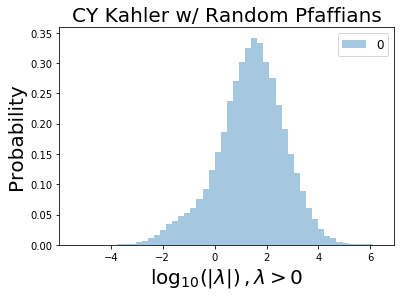

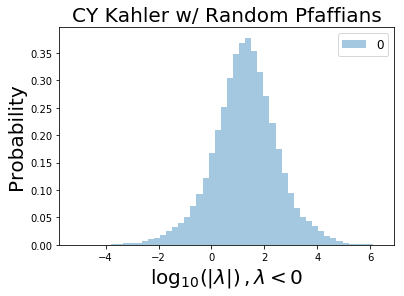

frac pos =  0.57559
frav neg =  0.42441


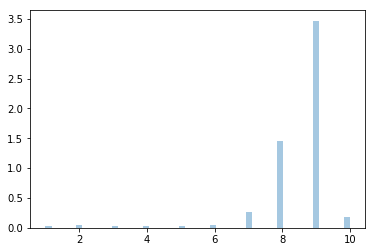

[0, 47, 70, 54, 48, 54, 71, 482, 2613, 6243, 318, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
#postive eigenvalues
pos_spec = [np.log10(ev) for ev in spec if ev > 0]
sns.distplot(pos_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Pfaffians",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda > 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()

#negative eigenvalues
neg_spec = [np.log10(-ev) for ev in spec if ev < 0]
sns.distplot(neg_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Pfaffians",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda < 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()
num_pos = len(pos_spec)*1.0
num_neg = len(neg_spec)*1.0
tt = (num_pos + num_neg)
print "frac pos = ", num_pos/tt
print "frav neg = ", num_neg/tt

sns.distplot(number_neg,kde=False,norm_hist = True)
plt.show()

print [number_neg.count(k) for k in range(20)]

In [156]:
spec  = []
numdrawspergeom = 10
for ii in range(len(kdata)):
#for ii in range(1):
    for jj in range(numdrawspergeom):
        #all Kahler derivatives
        k1 = np.array(kdata[ii][0])
        k2 = np.array(kdata[ii][2])
        k2inv = np.array(kdata[ii][1])
        k3 =np.array(kdata[ii][3])
        k4 =  np.array(kdata[ii][4])
        R4 =  np.array(kdata[ii][5])
        
        As = np.random.normal(loc = 0, scale = var,size = h11) + 1j*np.random.normal(
            loc = 0, scale = var,size = h11)
        #Wnpterms = np.array([As[nn]*np.exp(-2*np.pi*np.abs(2*k1[nn])) for nn in range(h11)])
        #superpotential and its derivatives, drawn randomly
        W0 = np.random.normal(loc = 0, scale = var) + 1j*np.random.normal(loc = 0, scale = var)
        W = W0 
        W1 = np.full([h11],0)
        W2 = np.full([h11,h11],0)
        W3 = np.full([h11,h11,h11],0)
        #for zz in range(h11):
        #    W2[zz,zz] = -2*np.pi*W1[zz]
        #    W3[zz,zz,zz] = -2*np.pi*(-2*np.pi*W1[zz])

        #metric inverse:
        #k2inv = np.linalg.inv(k2)

        #christoffels, last index is up:
        Gamma = np.einsum('ijk,kl',k3,k2inv)

        #F-terms:
        F1 = W1 + W*k1

        # #F-term derivative
        # dF1 = W2 + W*k2 + np.einsum('i,j',W1,k1)

        #Z-matrix:
        Z2 = W2 + W*k2 + np.einsum('i,j',k1,W1) + np.einsum('i,j',W1,k1) + W*np.einsum('i,j',k1,k1) 
        - np.einsum('ijk,k',Gamma,F1)

        #U-tensor
        #fully symmetrized version:

        U1 = W3 + k3*W + W*np.einsum('i,j,k',k1,k1,k1) - np.einsum('lm,mijk,l',k2inv,k4,F1)
        U2 = np.einsum('ij,k',k2,W1) + np.einsum('ik,j',k2,W1) + np.einsum('jk,i',k2,W1)
        U3 = np.einsum('ij,k',W2,k1) + np.einsum('ik,j',W2,k1) + np.einsum('jk,i',W2,k1)
        U4 = np.einsum('ij,k',k2,k1*W) + np.einsum('ik,j',k2,k1*W) + np.einsum('jk,i',k2,k1*W)
        U5 = np.einsum('i,j,k',k1,k1,W1) + np.einsum('k,j,i',k1,k1,W1) + np.einsum('i,k,j',k1,k1,W1)
        U6 = -np.einsum('jil,kl',Gamma,W2) -np.einsum('jkl,il',Gamma,W2) -np.einsum('ikl,jl',Gamma,W2)
        U7 = -np.einsum('jil,kl',Gamma,k2*W) -np.einsum('jkl,il',Gamma,k2*W) -np.einsum('ikl,jl',Gamma,k2*W)
        U8 = -np.einsum('jil,k,l',Gamma,k1,k1*W) -np.einsum('jkl,i,l',Gamma,k1,k1*W) 
        -np.einsum('kil,j,l',Gamma,k1,k1*W)
        U9 = -np.einsum('jil,k,l',Gamma,W1,k1) -np.einsum('jkl,i,l',Gamma,W1,k1) -np.einsum('kil,j,l',Gamma,W1,k1)
        U10 = -np.einsum('jil,k,l',Gamma,k1,W1) -np.einsum('jkl,i,l',Gamma,k1,W1) -np.einsum('kil,j,l',Gamma,k1,W1)
        U11 = np.einsum('klm,ijl,m',Gamma,Gamma,W1) + np.einsum('jlm,ikl,m',Gamma,Gamma,W1) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,W1)
        U12 = np.einsum('klm,ijl,m',Gamma,Gamma,k1*W) + np.einsum('jlm,ikl,m',Gamma,Gamma,k1*W) 
        + np.einsum('ilm,kjl,m',Gamma,Gamma,k1*W)

        U = U1 + U2 + U3 + U4 + U5 + U6 + U7 + U8 + U9 + U10 + U11 + U12

        #make the Hessian pieces
        Habarb = np.einsum('il,lk,jk',Z2,k2inv,np.conj(Z2)) - np.einsum('i,j',F1,np.conj(F1)) 
        - np.einsum('ijkl,km,ln,m,n',R4,k2inv,k2inv,np.conj(F1),F1)
        Hbarab = np.conj(Habarb)
        Hab = np.einsum('ijk,kl,l',U,k2inv,np.conj(F1)) - Z2*np.conj(W)
        Hbarabarb = np.transpose(np.conj(Hab))
        #assemble the Hessian
        H = np.block([[Habarb, Hab],[Hbarabarb, Hbarab]]) 
        + np.block([[k2, np.full((h11,h11),0)],[np.full((h11,h11),0), k2]])*(np.einsum('i,ik,k',F1,k2inv,F1)
                                                                             - 2*W*np.conj(W))
        spec = spec + list([np.real(ee) for ee in np.linalg.eig(H)[0]])

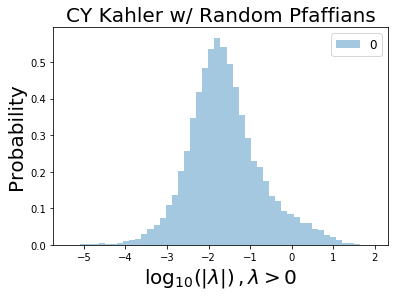

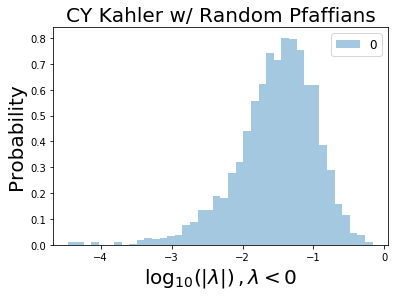

frac pos =  0.95
frav neg =  0.05


In [157]:
#postive eigenvalues
pos_spec = [np.log10(ev) for ev in spec if ev > 0]
sns.distplot(pos_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Pfaffians",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda > 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()

#negative eigenvalues
neg_spec = [np.log10(-ev) for ev in spec if ev < 0]
sns.distplot(neg_spec,
             kde=False, label='0', norm_hist = True)
plt.legend(prop={'size':12})
plt.title("CY Kahler w/ Random Pfaffians",fontsize = 20)
plt.xlabel("log$_{10}(|\lambda|)\, , \lambda < 0$",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.show()
num_pos = len(pos_spec)*1.0
num_neg = len(neg_spec)*1.0
tt = (num_pos + num_neg)
print "frac pos = ", num_pos/tt
print "frav neg = ", num_neg/tt

In [158]:
spec

[12.131154931381237,
 7.478205662809836,
 0.9681920366224308,
 0.9632756310044501,
 0.6566589795304622,
 0.1964484221755658,
 0.19601204396295616,
 0.14171519312131156,
 0.12274976353459383,
 -0.03596096693157296,
 0.04597791531163536,
 0.043476490408468786,
 0.032850097917196605,
 0.0321116746727741,
 0.022904467761058835,
 0.024503900440014808,
 0.026694191106355826,
 0.02617840206032346,
 0.015990248796669125,
 0.015992053650146963,
 11.264867875216087,
 6.944186205826858,
 0.8990533409293242,
 0.8944880163559636,
 0.609766892379878,
 0.18242001957930803,
 0.1820148031810519,
 0.1315952961984313,
 0.11398418994326259,
 -0.033392990481271256,
 0.04269462751844307,
 0.04037182963199603,
 0.03050426895234654,
 0.0298185765891957,
 0.021268857296990774,
 0.02275407431880308,
 0.024787956097493333,
 0.02430899960133826,
 0.01484838343956991,
 0.014850059408328875,
 11.338956241758389,
 6.989857705808675,
 0.9049663613220195,
 0.9003710108797343,
 0.6137772929922615,
 0.1836197852067444,
